# MOBILE REVIEW SENTIMENT ANALYSIS

## In this mini project we have extracted the reviews from the [website](https://www.91mobiles.com/Xiaomi-Redmi+Note+7+Pro-viewReview.html) of a particular product(Xiomi-redmi note pro 7) and product's sentiment analysis and on users feedback on it is analysed by calculating the average rating in the reviews and performing sentiment analsys


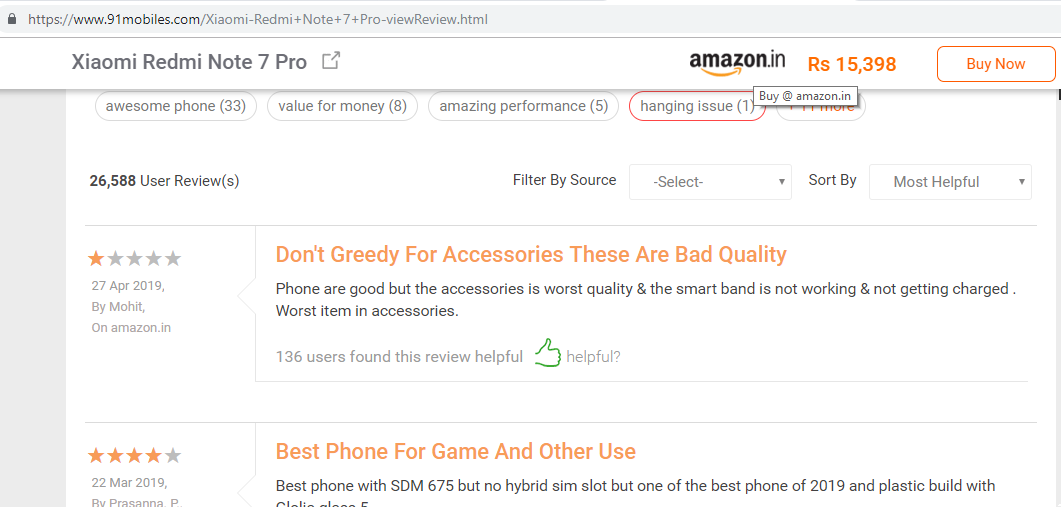

In [ ]:
from PIL import Image
Image.open('C:/Users/prashasti agrawal/Desktop/scr.png')

### A screenshot of the sample review. The left portion has the star which is stored in rating %
#### the heading review as in ***"Don't greedy--Quality"*** is the heading
#### ***"Phone are---accessories"*** is the detail review

### In the below cell , we have scraped the entire **head reviews**, **detailed reviews** and **rating** from the site using BeautifulSoup libraries

In [ ]:
from bs4 import BeautifulSoup
import pandas
import requests
import json
collector=[]
for pos,i in enumerate(range(1,500)):
    try:
        url="https://www.91mobiles.com/loadmore_user_review.php?brand=Xiaomi&model=Redmi+Note+7+Pro&page="
        so=requests.get(f"{url}{i}").text
        data = json.loads(so).get('response').replace('\n','').strip()
        soup = BeautifulSoup(data,'lxml')
        has_data = len(soup.find_all(attrs={'class':'review_section'}))
        if not has_data:
            break
        for item in soup.find_all('div',class_="review_section"):
            parablock =item.find('div',attrs={'class':"rw-area"})
            if parablock.p:
                details = parablock.p.text
            else:
                details = ''
            ratingblock = item.find(attrs={'class':'rating_rw'})
            rating =ratingblock.attrs.get('style').split(':')[1].strip().replace('%;','')
            collector.append({
                'heading':item.find('div',class_="rw-heading").text,
                'detail review':details,
                'rating %':rating

             })
    except e:
        break
pandas.DataFrame(collector).to_csv('xiaomi91mobiles.csv') 

## Code for performing Sentiment Analysis using TextBlob library

In [ ]:
from textblob import TextBlob
def getSentiment(data):
    if isinstance(data,str):
        blob =TextBlob(str(data))
        senti = [sentence.sentiment.polarity for sentence in blob.sentences]
        avg_sentiment = sum(senti)/len(senti) 
        return avg_sentiment
    else:
        return 0


In [ ]:
data=pandas.read_csv('xiaomi91mobiles.csv')
data.loc[:,'sentiments'] = data['detail review'].apply(getSentiment)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
Unnamed: 0       181 non-null int64
detail review    179 non-null object
heading          181 non-null object
rating %         181 non-null int64
sentiments       181 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.1+ KB


## Plotting average rating frequency on a scale of 1-100

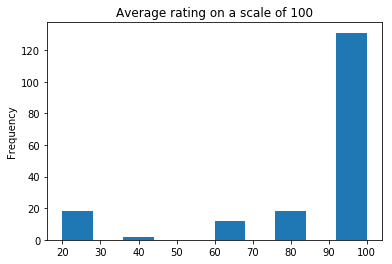

In [ ]:
data['rating %'].plot(kind='hist',title='Average rating on a scale of 100')

### Hence we can say that maximum customers have given it 90+ score

## Sentiment analysis on detailed reviews

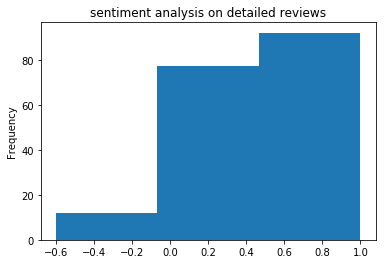

In [ ]:
data.sentiments.plot(kind='hist',bins=3,title='sentiment analysis on detailed reviews')

In [ ]:
data.loc[:,'sentiments_heading'] = data['heading'].apply(getSentiment)

In [ ]:
data.head(3)

,Unnamed: 0,detail review,heading,rating %,sentiments,sentiments_heading
0,0,Phone are good but the accessories is worst qu...,Don't greedy for accessories these are bad qua...,20,-0.514286,-0.700000
1,1,Best phone with SDM 675 but no hybrid sim slot...,best phone for game and other use,80,1.000000,0.158333
2,2,excellent camera,nice mobile,100,1.000000,0.600000


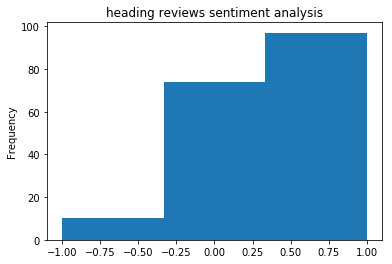

In [ ]:
data.sentiments_heading.plot(kind='hist',bins=3,title='heading reviews sentiment analysis')

### the headline reviews and the detailed reviews are obviously nearly the same
#### positive sentients are more than the negative ones

## Mean rating of the phone

In [ ]:
data['rating %'].mean()

86.74033149171271

### which is 86.7. Good one!

### Average stars given in totality of rating

In [ ]:
p=(86.7/100)*5

In [ ]:
print(int(p)*'*')

****


### bingo! 4 stars